# The Bass Innovation Model

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Time vector
t = np.linspace(0, 50, 100)

### Simple Bass model

Translate the Bass model to Python using the following set of differential equations:

$$
\begin{align*}
\frac{dA}{dt} &= c \cdot i \cdot A \cdot P \\
\frac{dP}{dt} &= -\frac{dA}{dt}
\end{align*}
$$

where `A` is the proportion of adopters, `P` is the proportion of potential adopters, `c` is the contact rate, `i` is the probability of adoption. Solve the model with Scipy's `odeint` and create interactive plots with `ipywidgets`.

In [2]:
# Define the system of ODEs
def adoption_dt(y, t, c, i):
    # your code here
    dAdt = c*i*y[0]*y[1]
    dPdt = -dAdt
    return [dAdt, dPdt]

initial_conditions = [.01, .99]

In [3]:
# Interactive plot
@interact(c=(0.1, 1, 0.1), i=(0.1, 1, 0.1))
def plot(c, i):
    solution = odeint(adoption_dt, initial_conditions, t, args=(c, i))
    A, P = solution.T
    plt.figure(figsize=(6, 4))
    plt.plot(t, A, label='Adopters')
    plt.plot(t, P, label='Potential Adopters')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=0.5, description='c', max=1.0, min=0.1), FloatSlider(value=0.5, descri…


### Addition of drop rate

Extend the model by adding a term representing the people who drop out of the adopters group:

$$
\begin{align*}
\frac{dA}{dt} &= c \cdot i \cdot A \cdot P - d \cdot A \\
\frac{dP}{dt} &= -c \cdot i \cdot A \cdot P \\
\frac{dD}{dt} &= d \cdot A
\end{align*}
$$

where `D` is the number of droppers and `d` is the drop rate. Again, solve the model and create interactive plots.

In [4]:
# Update the system of ODEs to include the drop rate
def adoption_drop_dt(y, t, c, i, d):
    dPdt = -c*i*y[0]*y[1]
    dAdt = -dPdt - d*y[0]
    dDdt = d*y[0]
    # your code here
    return [dAdt, dPdt, dDdt]

initial_conditions = [.02, .97, .01]

# Parameters
d = 0.1

# Update interactive plot
@interact(c=(0.0, 1, 0.1), i=(0.0, 1, 0.1), d=(0.0, 1, 0.01))
def plot(c=0.8, i=0.8, d=0.1):
    solution = odeint(adoption_drop_dt, initial_conditions, t, args=(c, i, d))
    A, P, D = solution.T
    plt.figure(figsize=(6, 4))
    plt.plot(t, A, label='Adopters')
    plt.plot(t, P, label='Potential Adopters')
    plt.plot(t, D, label='Droppers')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=0.8, description='c', max=1.0), FloatSlider(value=0.8, description='i'…


### Adding reset rate

Now include a reset rate `r` where some of the droppers become potential adopters again:

$$
\begin{align*}
\frac{dA}{dt} &= c \cdot i \cdot A \cdot P - d \cdot A \\
\frac{dP}{dt} &= r \cdot D - c \cdot i \cdot A \cdot P \\
\frac{dD}{dt} &= d \cdot A - r \cdot D
\end{align*}
$$

Solve the model and create interactive plots.

In [5]:
# Update the system of ODEs to include the reset rate
def adoption_reset_dt(y, t, c, i, d, r):
    # your code here
    ciap = c*i*y[0]*y[1]
    dAdt = ciap-d*y[0]
    dPdt = r*y[2]-ciap
    dDdt = d*y[0]-r*y[2]
    return [dAdt, dPdt, dDdt]

# Parameters
initial_conditions = [0.02, .97, .01]

# Update interactive plot
@interact(c=(0.0, 1, 0.1), i=(0.0, 1, 0.1), d=(0.0, 1, 0.01), r=(0.0, 1, 0.01))
def plot(c=0.8, i=0.8, d=0.1, r=0.2):
    solution = odeint(adoption_reset_dt, initial_conditions, t, args=(c, i, d, r))
    A, P, D = solution.T
    plt.figure(figsize=(6,4))
    plt.plot(t, A, label='Adopters')
    plt.plot(t, P, label='Potential Adopters')
    plt.plot(t, D, label='Droppers')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=0.8, description='c', max=1.0), FloatSlider(value=0.8, description='i'…

$$
\begin{align*}
\frac{dA}{dt} &= c \cdot i \cdot A \cdot P - d \cdot A \\
\frac{dP}{dt} &= r \cdot D - c \cdot i \cdot A \cdot P \\
\frac{dD}{dt} &= d \cdot A - r \cdot D
\end{align*}
$$

### Varying probability of adoption

In the previous tasks, we assumed the probability of adoption `i` to be constant. Now, let's make it more interesting by making `i` be seasonal. To do we use the `np.sin()` function to create a sine wave. We then use this sine wave to vary the probability of adoption `i` over time. Note that this makes the ODE nonautonomous, which means that the right-hand side of the ODE depends on time.

In [6]:
# Update the system of ODEs to make the probability of adoption vary with the proportion of adopters

def adoption_prob(t):
    return (np.cos(t/2) + 1)/ 2

def adoption_var_dt(y, t, c, d, r):
    # your code here
    ciap = c*adoption_prob(t)*y[0]*y[1]
    dAdt = ciap-d*y[1]
    dPdt = r*y[2]-ciap
    dDdt = d*y[1]-r*y[2]
    return [dPdt, dAdt, dDdt]

initial_conditions = [0.02, .97, 0.01]

# Update interactive plot
@interact(c=(0.0, 1, 0.1), d=(0.0, 1, 0.01), r=(0.0, 1, 0.01))
def plot(c, d, r):
    # Solve the system of ODEs
    P, A, D = odeint(adoption_var_dt, initial_conditions, t, args=(c, d, r)).T

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.plot(t, P, label='Potential Adopters')
    plt.plot(t, A, label='Adopters')
    plt.plot(t, D, label='Droppers')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()



interactive(children=(FloatSlider(value=0.5, description='c', max=1.0), FloatSlider(value=0.5, description='d'…

## Bonus: Complex Contagion (To be discussed in class)

The Bass innovation model is a simple contagion model. It assumes that exposure to a single adopter is enough to turn a potential adopter into an actual adopter. This assumption, while simplifying the mathematics, might not be realistic for many social phenomena. 

The concept of [Complex contagion] provides a different perspective. According to this theory, many social behaviors require exposure from multiple sources before an individual adopts the behavior. These contagions can be more accurately described as "complex," and include phenomena like strategic complementarity, credibility, legitimacy, and emotional contagion.

To model complex contagions, the tools of complex network analysis are typically needed. In a network model, individuals are represented as nodes, and their social relationships are represented as edges. Complex contagions can then be modeled by stipulating that a node needs to be connected to a certain number of infected nodes before becoming infected itself.

However, complex network analysis introduces its own challenges. For one, it's more computationally intensive than simple ODE models. Additionally, the results of network models can be harder to interpret, as they often depend on the specific structure of the network.

ODE models like the Bass innovation model are powerful tools for understanding the spread of innovations, but they are not the only tool at our disposal.

**Discussion Questions:**

1. Can you think of any real-world examples of simple and complex contagions? How might they behave differently?
2. How might you modify the Bass model to account for complex contagions?
3. What challenges might you face when modeling complex contagions?
4. How could you use real-world data to inform a network model of a complex contagion?
5. What new insights might a network model provide, compared to a simple ODE model?
6. How might the results of a network model inform business or policy decisions?

[Complex contagion]: Centola, Damon, and Michael Macy. "Complex Contagions and the Weakness of Long Ties." American Journal of Sociology 113, no. 3 (November 2007): 702–34. https://doi.org/10.1086/521848.

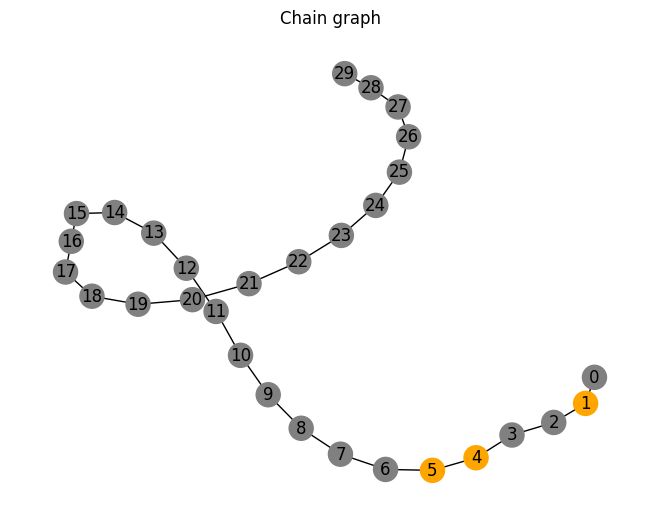

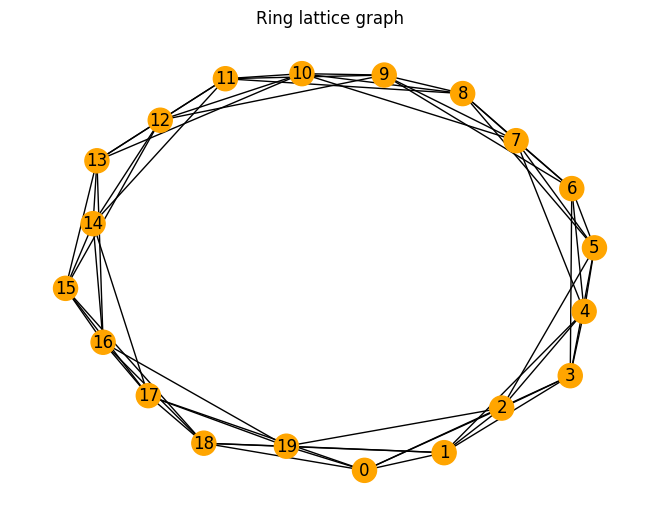

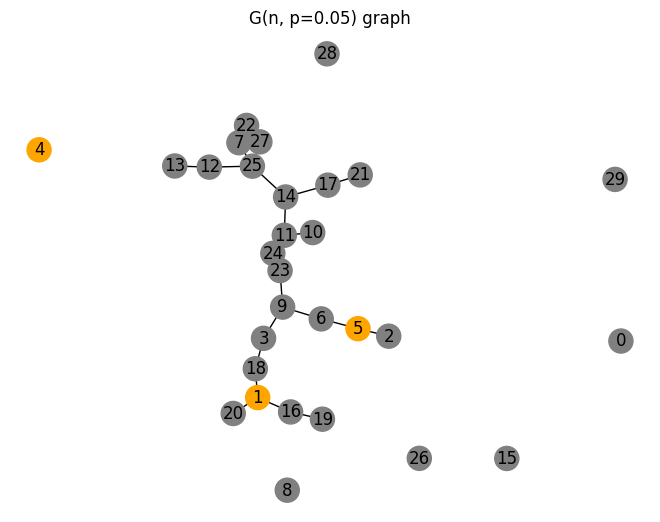

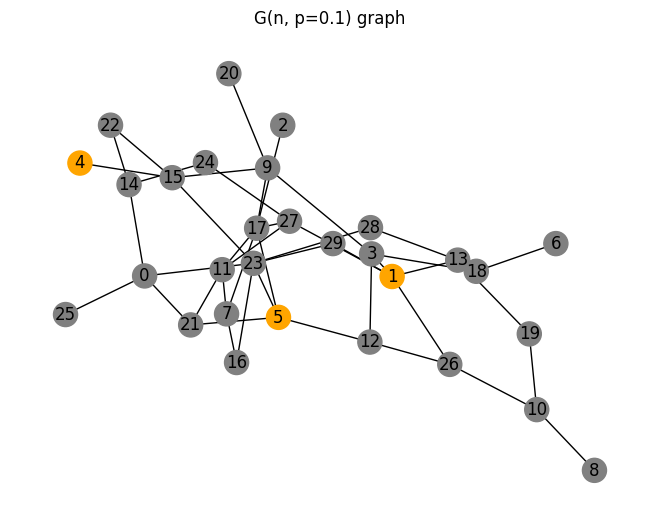

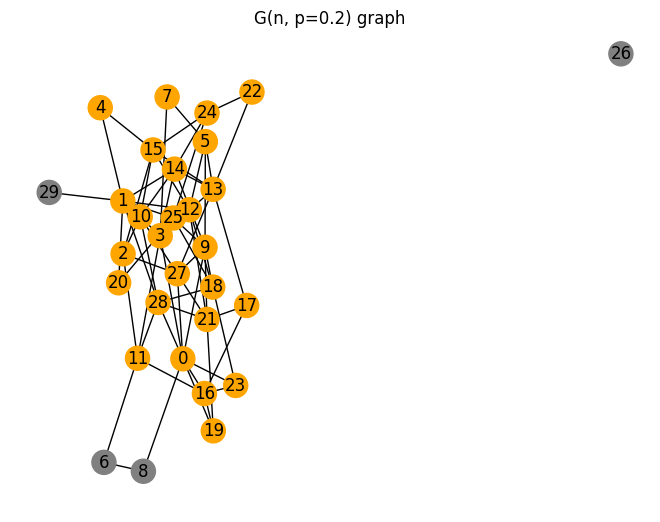

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the contagion threshold
threshold = 2

# List of initially infected nodes
initial_infected_nodes = [1, 5, 4]

def simulate_contagion(graph):
    # Initialize all nodes as not infected
    infected = [False] * graph.number_of_nodes()
    
    # Infect initial nodes
    for node in initial_infected_nodes:
        infected[node] = True

    # Continue simulation until no new infections occur
    while True:
        new_infections = 0
        for node in graph.nodes():
            if not infected[node] and sum(infected[n] for n in graph.neighbors(node)) >= threshold:
                infected[node] = True
                new_infections += 1
        if new_infections == 0:
            break
    return infected

def plot_graph(graph, infected, title):
    # Assign color based on infection status
    node_colors = ["orange" if infected[node] else "gray" for node in graph.nodes()]
    
    # Draw the graph
    nx.draw_spring(graph, with_labels=True, node_color=node_colors)
    plt.title(title)
    plt.show()

# Graphs dictionary
graphs = {
    "Chain graph": nx.path_graph(30),
    "Ring lattice graph": nx.watts_strogatz_graph(20, 6, 0),
    "G(n, p=0.05) graph": nx.gnp_random_graph(30, 0.05),
    "G(n, p=0.1) graph": nx.gnp_random_graph(30, 0.1),
    "G(n, p=0.2) graph": nx.gnp_random_graph(30, 0.2),
}

# Run simulation and plot each graph
for title, graph in graphs.items():
    infected = simulate_contagion(graph)
    plot_graph(graph, infected, title)
